Code for running through network from:
https://colab.research.google.com/github/pytorch/pytorch.github.io/blob/master/assets/hub/pytorch_vision_googlenet.ipynb


---

After obtaining images from activation maximization, run them through InceptionV1

# Get output probabilities

In [ ]:
%%capture
import torch
import torchvision.models as models
from torchvision import transforms
import copy
from PIL import Image
import IPython.display  # display image

# model = torch.hub.load('pytorch/vision:v0.9.0', 'googlenet', pretrained=True)
model = models.googlenet(pretrained=True)  #w/o arg, this will not pretrain it
# model = models.vgg16(pretrained=True)

model.eval() #set model in eval mode: https://stackoverflow.com/questions/60018578/what-does-model-eval-do-in-pytorch

# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

In [ ]:
from google.colab import files
files.upload()

In [ ]:
def get_output(model, input_image):
    # input_image = Image.open(input)
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')

    with torch.no_grad():
        output = model(input_batch)
    return output
    # Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
    # print(output[0])  # The output has unnormalized scores. To get probabilities, you can run a softmax on it.

def output_probs(model, input_image):
    output = get_output(model, input_image)
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    return probabilities

def get_top_categories(probabilities, categories):
  top5_prob, top5_catid = torch.topk(probabilities, 5)
  for i in range(top5_prob.size(0)):
      print(categories[top5_catid[i]], top5_prob[i].item())


channel-1.png


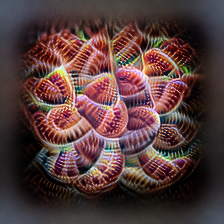

coil 0.6398937702178955
brain coral 0.13883578777313232
chambered nautilus 0.016224157065153122
chiton 0.007359746843576431
pretzel 0.007006283383816481
----------------------------------------------------------------------------------------------------
channel-2.png


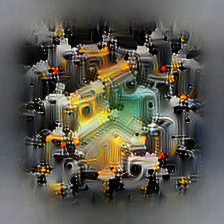

fire engine 0.0997927188873291
traffic light 0.03419411927461624
steam locomotive 0.0327567383646965
cab 0.03239127993583679
hard disc 0.024217506870627403
----------------------------------------------------------------------------------------------------
channel-447.png


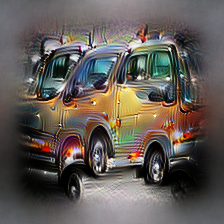

tow truck 0.191592276096344
moving van 0.142949640750885
minivan 0.0802353248000145
garbage truck 0.05618303641676903
ambulance 0.05195917934179306
----------------------------------------------------------------------------------------------------
channel-448.png


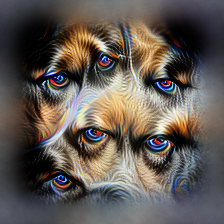

Eskimo dog 0.06484375894069672
Saluki 0.029758060351014137
bluetick 0.029271896928548813
Siberian husky 0.02687337063252926
beagle 0.012022259645164013
----------------------------------------------------------------------------------------------------
channel-449.png


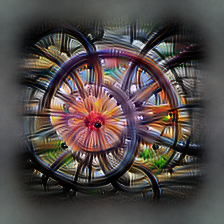

tricycle 0.08881033957004547
horse cart 0.08556762337684631
oxcart 0.0743657648563385
jinrikisha 0.042819567024707794
thresher 0.04202505201101303
----------------------------------------------------------------------------------------------------


In [ ]:
input_image_list = ['channel-1.png', 'channel-2.png', 'channel-447.png', 'channel-448.png', 'channel-449.png']

for input_image_name in input_image_list:
    input_image = Image.open(input_image_name) 
    probs_feature_viz = output_probs(model, input_image)
    print(input_image_name)
    display(IPython.display.Image(input_image_name))  
    get_top_categories(probs_feature_viz, categories)
    print('-'*100)

4c:447 has "car" subclasses have highest output probabilities, as expected

4c: 448 (looking like dog eyes) shows dog subclasses with the highest

4c:449 (looking like a spiral wheel) has tricycle and cart subclasses as the highest

4c:1, which looks like some sort of combined texture pattern, shows classes like 'coil, coral, pretzel' as the highest. 

4c:2, which doesn't look like anything, has very low prob for the highest class (0.09 for fire engine) but the top classes seem related to "vehicles", with traffic light, steam, and cab being the next highest.


---

By left pane: Manually create new folder (right-click) then upload files to it

In [ ]:
import os 

numSamp = 10

input_image_list = []
data_dir = 'test'
sample1 = os.listdir(data_dir)[0:numSamp]
for filename in sample1:
    f = os.path.join(data_dir, filename)
    input_image_list.append(f)

test/channel-1015.png


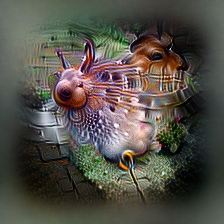

puffer 0.10669006407260895
broccoli 0.046879250556230545
hen 0.03189373016357422
strainer 0.026753617450594902
muzzle 0.020440973341464996
----------------------------------------------------------------------------------------------------
test/channel-1017.png


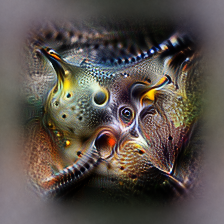

strainer 0.2680985629558563
saltshaker 0.05110303685069084
mask 0.03705407679080963
triceratops 0.03239712491631508
thimble 0.02133455127477646
----------------------------------------------------------------------------------------------------
test/channel-1018.png


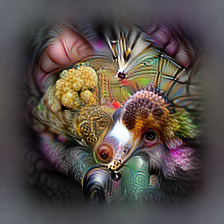

peacock 0.07727192342281342
Shetland sheepdog 0.059886734932661057
pineapple 0.04034336656332016
mask 0.030684135854244232
crane 0.02570941485464573
----------------------------------------------------------------------------------------------------
test/channel-1020.png


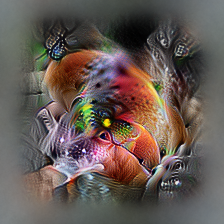

goldfish 0.1291569471359253
puffer 0.046694088727235794
lorikeet 0.03293580561876297
spindle 0.01758028194308281
feather boa 0.01329153124243021
----------------------------------------------------------------------------------------------------
test/channel-1021.png


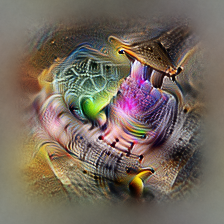

rubber eraser 0.060003917664289474
conch 0.03984367102384567
bubble 0.038528069853782654
thimble 0.0360918864607811
spindle 0.032194264233112335
----------------------------------------------------------------------------------------------------
test/channel-1013.png


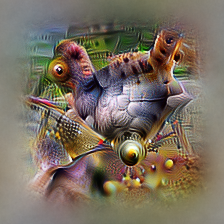

triceratops 0.03605346754193306
hen 0.02603074721992016
hippopotamus 0.025767577812075615
conch 0.018774813041090965
partridge 0.016895048320293427
----------------------------------------------------------------------------------------------------
test/channel-1019.png


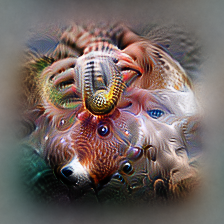

mask 0.026314938440918922
pillow 0.021359257400035858
muzzle 0.01581251621246338
ocarina 0.01564900577068329
piggy bank 0.014407318085432053
----------------------------------------------------------------------------------------------------
test/channel-1014.png


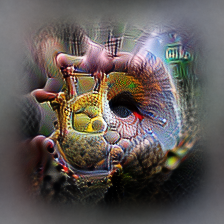

buckle 0.0224738959223032
ocarina 0.02134002186357975
triceratops 0.02076176181435585
pitcher 0.019975362345576286
teapot 0.0195595882833004
----------------------------------------------------------------------------------------------------
test/channel-1022.png


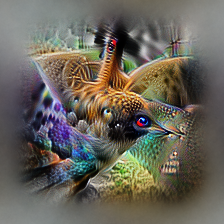

prairie chicken 0.06579957902431488
hummingbird 0.06393597275018692
peacock 0.06149054691195488
bustard 0.060123518109321594
sombrero 0.0325779989361763
----------------------------------------------------------------------------------------------------
test/channel-1023.png


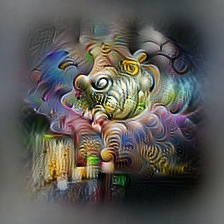

jigsaw puzzle 0.18403178453445435
mask 0.1444384902715683
caldron 0.0326949767768383
carousel 0.03052401915192604
vase 0.02394997514784336
----------------------------------------------------------------------------------------------------


In [ ]:
for input_image_name in input_image_list:
    input_image = Image.open(input_image_name)
    probs_feature_viz = output_probs(model, input_image)
    print(input_image_name)
    display(IPython.display.Image(input_image_name))
    get_top_categories(probs_feature_viz, categories)
    print('-'*100)